## NULL VALUES

There are many ways of finding null values in the dataset. Let's see them.

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("fuel_ferc1.csv")

In [3]:
data.head(2)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120


In [14]:
data.shape

(29523, 11)

### 1. Check number of NULL values in each columns

In [5]:
data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

### 2. The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

"True" stands for missing value, while "False" stands for not missing value.

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>

In [6]:
missing_data = data.isnull()
missing_data.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [7]:
missing_data.columns.values.tolist()

['record_id',
 'utility_id_ferc1',
 'report_year',
 'plant_name_ferc1',
 'fuel_type_code_pudl',
 'fuel_unit',
 'fuel_qty_burned',
 'fuel_mmbtu_per_unit',
 'fuel_cost_per_unit_burned',
 'fuel_cost_per_unit_delivered',
 'fuel_cost_per_mmbtu']

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

record_id
False    29523
Name: record_id, dtype: int64

utility_id_ferc1
False    29523
Name: utility_id_ferc1, dtype: int64

report_year
False    29523
Name: report_year, dtype: int64

plant_name_ferc1
False    29523
Name: plant_name_ferc1, dtype: int64

fuel_type_code_pudl
False    29523
Name: fuel_type_code_pudl, dtype: int64

fuel_unit
False    29343
True       180
Name: fuel_unit, dtype: int64

fuel_qty_burned
False    29523
Name: fuel_qty_burned, dtype: int64

fuel_mmbtu_per_unit
False    29523
Name: fuel_mmbtu_per_unit, dtype: int64

fuel_cost_per_unit_burned
False    29523
Name: fuel_cost_per_unit_burned, dtype: int64

fuel_cost_per_unit_delivered
False    29523
Name: fuel_cost_per_unit_delivered, dtype: int64

fuel_cost_per_mmbtu
False    29523
Name: fuel_cost_per_mmbtu, dtype: int64



### 3. To find missing numbers and percentage in all columns(containing missing values)

This method is good to decide whether drop missing values based on percentage

In [11]:
# examin missing values
def missing_vals(data):
    mis_val=data.isnull().sum()
    mis_per=100*mis_val/len(data)
    mis_table=pd.concat([mis_val,mis_per],axis=1)
    mis_table=mis_table.rename(columns={0:'missing values',1:'missing percent'})
    mis_table=mis_table[mis_table.iloc[:,1] != 0].sort_values('missing percent',ascending=False).round(1)
    return mis_table
missing_vals(data).head()

,missing values,missing percent
fuel_unit,180,0.6


### 4.  This method is useful to find pattern of missing values in each column of dataset

White patch mean missing value corresponding to index of the rows

In [12]:
import seaborn as sns

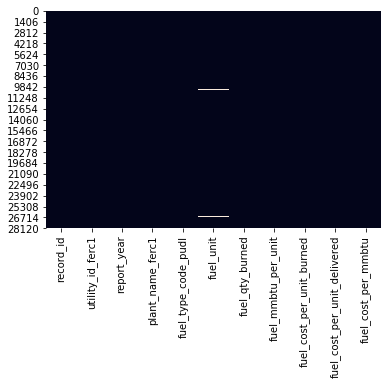

In [13]:
sns.heatmap(data.isnull(), cbar=False)